In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn

# Download latest version
path = kagglehub.dataset_download("prasad22/healthcare-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\prasad22\healthcare-dataset\versions\2


In [2]:
df = pd.read_csv(path+'\\health.csv')
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [3]:
df3 = df.drop(['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 
      'Admission Type', 'Discharge Date'], axis = 1)
df3['Gender'] = df3['Gender'].map({'Female': 1, 'Male': 0})

Medical_Condition_unique = np.unique(df3[['Medical Condition']])
Blood_Type_unique = np.unique(df3[['Blood Type']])
Medication_unique = np.unique(df3[['Medication']])
Test_Results_unique = np.unique(df3[['Test Results']])

for i in range(len(Medical_Condition_unique)):
    df3[f'Medical_Condition_{Medical_Condition_unique[i]}'] = df3['Medical Condition'].map({f'{Medical_Condition_unique[i]}': 1, '0': 0}).fillna(0)
for i in range(len(Blood_Type_unique)):
    df3[f'Blood_Type_{Blood_Type_unique[i]}'] = df3['Blood Type'].map({f'{Blood_Type_unique[i]}': 1, '0': 0}).fillna(0)
for i in range(len(Medication_unique)):
    df3[f'Medication_{Medication_unique[i]}'] = df3['Medication'].map({f'{Medication_unique[i]}': 1, '0': 0}).fillna(0)
for i in range(len(Test_Results_unique)):
    df3[f'Test_Results_{Test_Results_unique[i]}'] = df3['Test Results'].map({f'{Test_Results_unique[i]}': 1, '0': 0}).fillna(0)

df3 = df3.drop(['Medical Condition', 'Blood Type', 'Medication', 'Test Results'], axis = 1)

df3

,Age,Gender,Medical_Condition_Arthritis,Medical_Condition_Asthma,Medical_Condition_Cancer,Medical_Condition_Diabetes,Medical_Condition_Hypertension,Medical_Condition_Obesity,Blood_Type_A+,Blood_Type_A-,...,Blood_Type_O+,Blood_Type_O-,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test_Results_Abnormal,Test_Results_Inconclusive,Test_Results_Normal
0,30,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,62,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,76,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,28,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,43,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
55496,61,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55497,38,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
55498,43,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


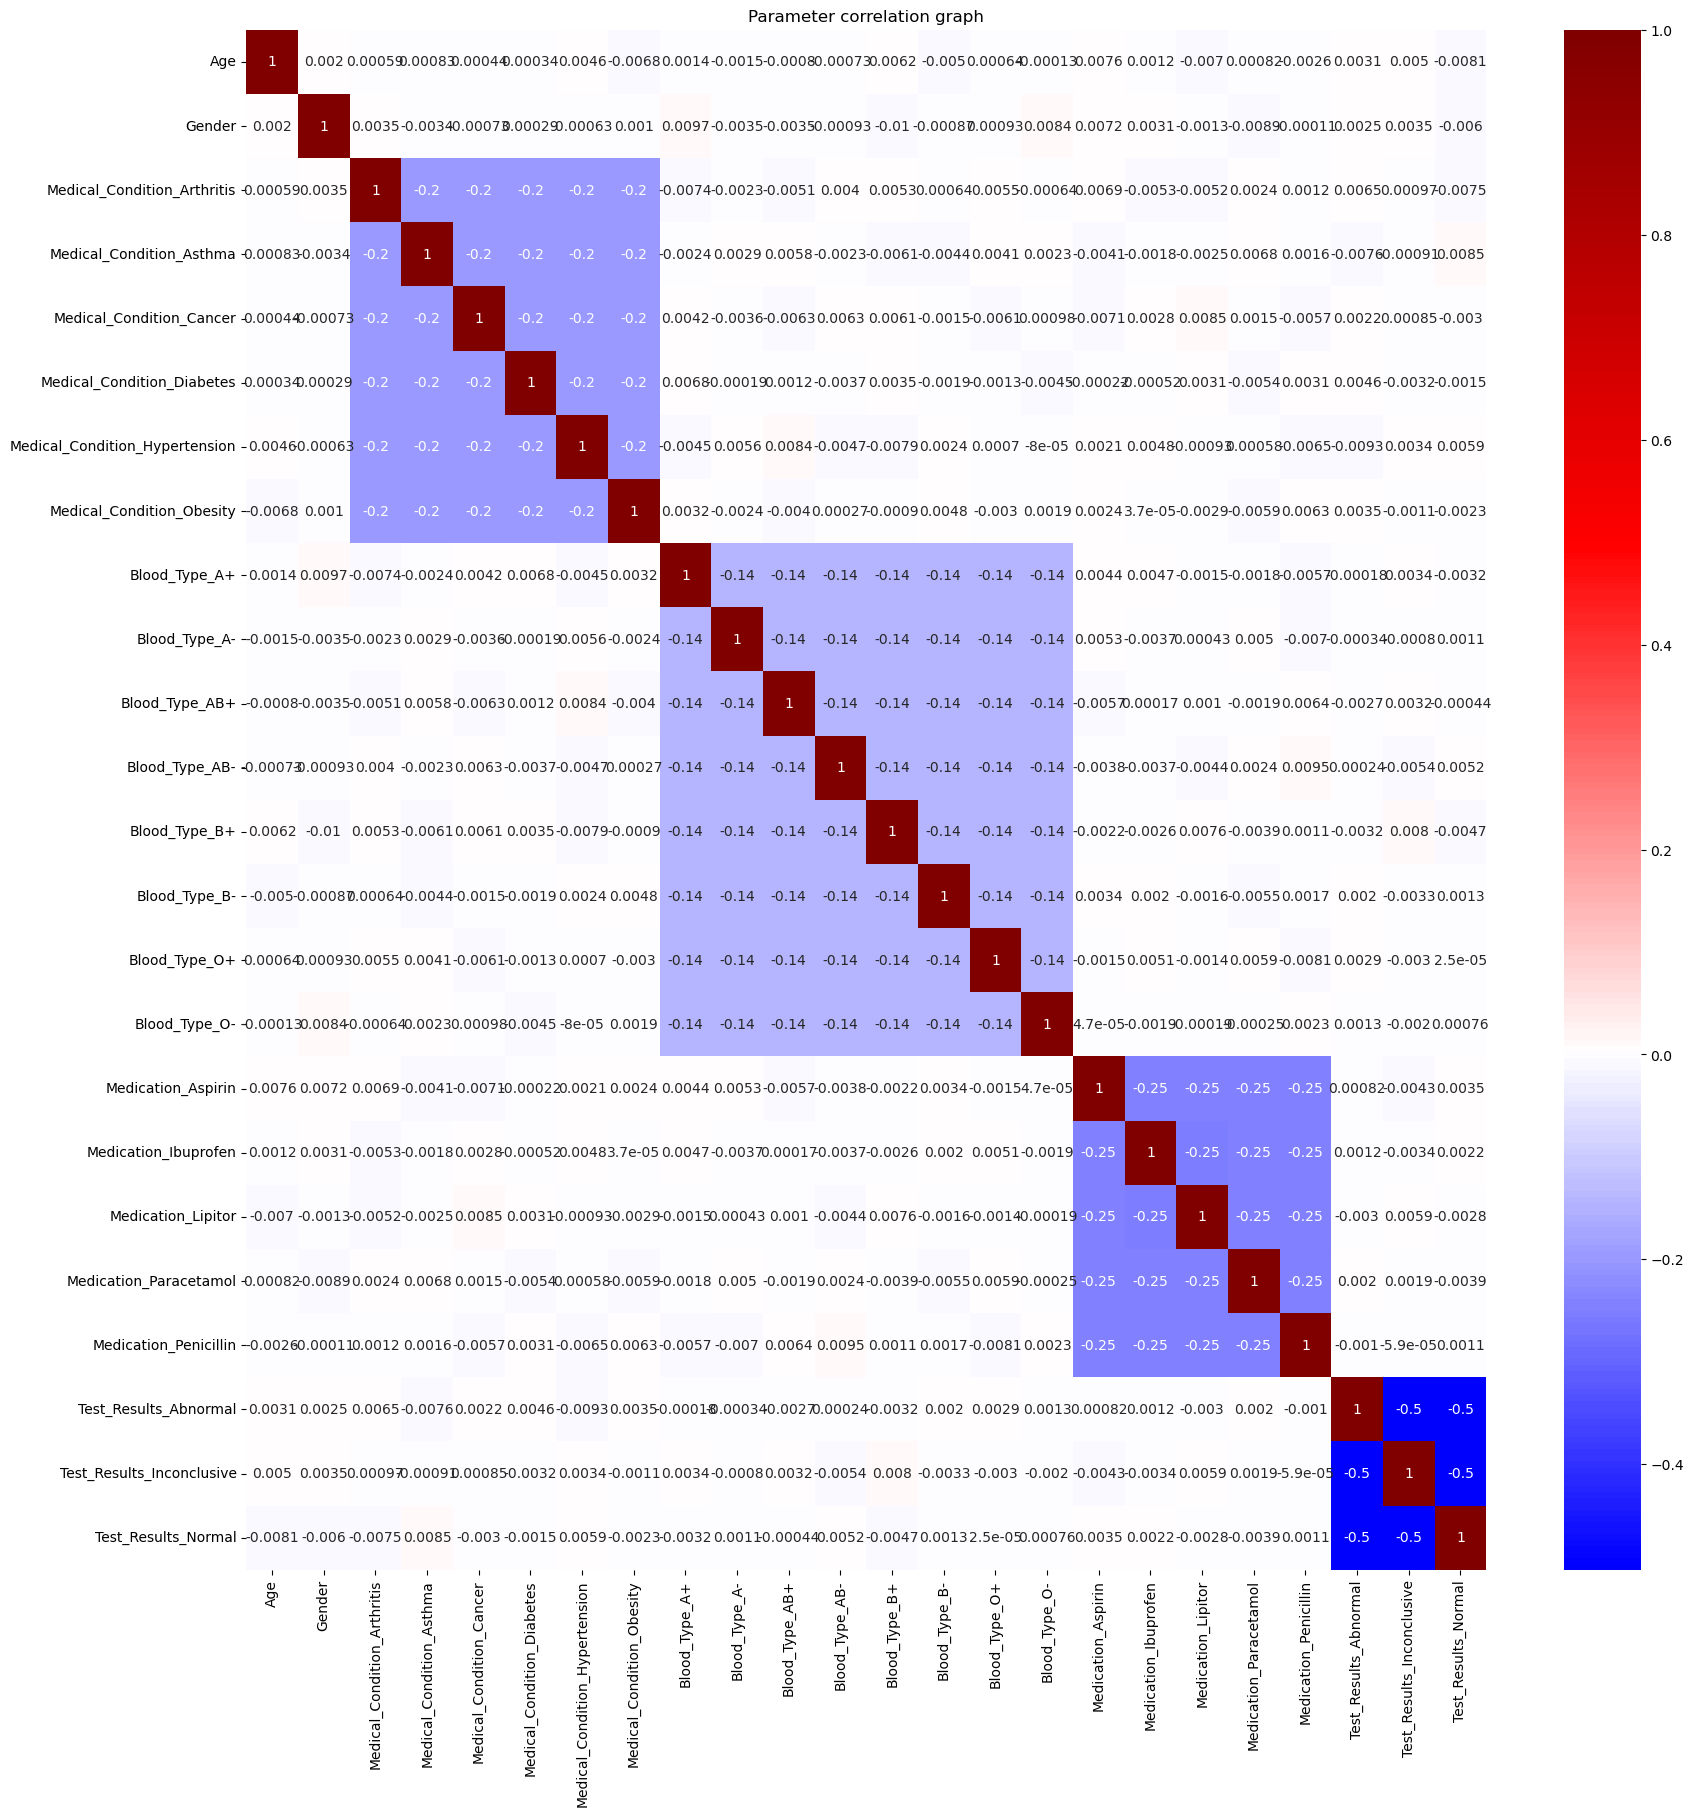

In [4]:
plt.figure(figsize=(20, 20))
seaborn.heatmap(df3.corr(), annot=True, cmap='seismic', center=0)
plt.title('Parameter correlation graph')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

x = df3.loc[:,df3.drop(['Test_Results_Abnormal', 'Test_Results_Inconclusive', 'Test_Results_Normal'], axis = 1).columns].to_numpy()
y = df3.loc[:,['Test_Results_Abnormal', 'Test_Results_Inconclusive', 'Test_Results_Normal']].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [6]:
x_train.shape, y_train.shape

((49950, 21), (49950, 3))

In [7]:
import tensorflow as tf
import keras

# Создаем модель
model = keras.Sequential([
    keras.layers.Dense(16, activation='sigmoid', input_shape=(21,)),
    keras.layers.Dense(8, activation='sigmoid'),
    keras.layers.Dense(3, activation='softmax')
])

# Визуализируем архитектуру
model.summary()

# Компилируем модель
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

# Обучаем модель
model.fit(x_train, y_train, validation_split = 0.15, batch_size = 16, epochs = 200, verbose = 0)

# Оценим точность модели
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nТестовая точность:', test_acc)

D:\zmei\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
D:\zmei\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515 (2.01 KB)

 Trainable params: 515 (2.01 KB)

 Non-trainable params: 0 (0.00 B)

174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - categorical_accuracy: 0.3234 - loss: 1.1037

Тестовая точность: 0.3234234154224396


In [8]:
f_predict = list(map(lambda x: x.argmax(), model.predict(x_train)[0:20]))
f_true = y_train[0:20]
for i in range(len(f_predict)):
    print(f'предикт: {f_predict[i]}, факт: {f_true[i]}, совпали? {1 == f_true[i][f_predict[i]]}')

1561/1561 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step 
предикт: 1, факт: [0. 0. 1.], совпали? False
предикт: 1, факт: [0. 0. 1.], совпали? False
предикт: 2, факт: [0. 0. 1.], совпали? True
предикт: 2, факт: [1. 0. 0.], совпали? False
предикт: 1, факт: [0. 1. 0.], совпали? True
предикт: 1, факт: [1. 0. 0.], совпали? False
предикт: 2, факт: [0. 0. 1.], совпали? True
предикт: 1, факт: [0. 0. 1.], совпали? False
предикт: 0, факт: [1. 0. 0.], совпали? True
предикт: 1, факт: [0. 1. 0.], совпали? True
предикт: 2, факт: [0. 1. 0.], совпали? False
предикт: 0, факт: [1. 0. 0.], совпали? True
предикт: 0, факт: [0. 1. 0.], совпали? False
предикт: 2, факт: [1. 0. 0.], совпали? False
предикт: 1, факт: [1. 0. 0.], совпали? False
предикт: 2, факт: [0. 1. 0.], совпали? False
предикт: 0, факт: [0. 0. 1.], совпали? False
предикт: 1, факт: [1. 0. 0.], совпали? False
предикт: 1, факт: [0. 0. 1.], совпали? False
предикт: 2, факт: [0. 1. 0.], совпали? False


In [33]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [30]:
def softmax(z):
    z = z - np.max(z, axis = 0, keepdims = True)
    numerator = np.exp(z)
    denominator = np.sum(numerator, axis = 0, keepdims = True)
    softmax = numerator / denominator
    return softmax

In [37]:
def cross_entropy(probs, y_enc, epsilon = 1e-9):
    n = probs.shape[1]
    ce = -np.sum(y_enc * np.log(probs + epsilon)) / n
    return ce

In [54]:
np.random.seed(33)

num_in = x_train.shape[1] #21
num_out = y_train.shape[1] #3
num_layer_1 = 16
num_layer_2 = 8

W1 = np.random.randn(num_layer_1, num_in)
b1 = np.zeros((num_layer_1, 1))
 
W2 = np.random.randn(num_layer_2, num_layer_1)
b2 = np.zeros((num_layer_2, 1))
 
W3 = np.random.randn(num_out, num_layer_2)
b3 = np.zeros((num_out, 1))
 
epochs = 2000
learning_rate = 1e-6
loss_history = []
 
A1 = x_train.T
 
for i in range(epochs):
 
    Z1 = np.dot(W1, A1) + b1 
    A2 = sigmoid(Z1)
 
    Z2 = np.dot(W2, A2) + b2
    A3 = sigmoid(Z2)
 
    Z3 = np.dot(W3, A3) + b3
    A4 = softmax(Z3)
 
    loss = cross_entropy(A4, y_train.T)
 
    W3_delta = A4 - y_train.T
    W2_delta = np.dot(W3.T, W3_delta) * A3 * (1 - A3)
    W1_delta = np.dot(W2.T, W2_delta) * A2 * (1 - A2)
 
    W3_derivative = np.dot(W3_delta, A3.T) / num_in
    b3_derivative = np.sum(W3_delta, axis = 1, keepdims = True) / num_in
 
    W2_derivative = np.dot(W2_delta, A2.T) / num_in
    b2_derivative = np.sum(W2_delta, axis = 1, keepdims = True) / num_in
 
    W1_derivative = np.dot(W1_delta, A1.T) / num_in
    b1_derivative = np.sum(W1_delta, axis = 1, keepdims = True) / num_in
 
    W3 = W3 - learning_rate * W3_derivative
    b3 = b3 - learning_rate * b3_derivative
    W2 = W2 - learning_rate * W2_derivative
    b2 = b2 - learning_rate * b2_derivative
    W1 = W1 - learning_rate * W1_derivative
    b1 = b1 - learning_rate * b1_derivative
 
    loss_history.append(loss)
 
    if i % (epochs / 10) == 0:
        print('Эпоха:', i)
        print('Ошибка:', loss)
        print('-----------------------')
 
print('Итоговая ошибка', loss)
print('Нейросеть успешно обучена')

Эпоха: 0
Ошибка: 1.2681487592794167
-----------------------
Эпоха: 200
Ошибка: 1.1467790588447462
-----------------------
Эпоха: 400
Ошибка: 1.1117949073091582
-----------------------
Эпоха: 600
Ошибка: 1.1020563789535243
-----------------------
Эпоха: 800
Ошибка: 1.0995491171245206
-----------------------
Эпоха: 1000
Ошибка: 1.0989218223753914
-----------------------
Эпоха: 1200
Ошибка: 1.098762052862
-----------------------
Эпоха: 1400
Ошибка: 1.098717011854732
-----------------------
Эпоха: 1600
Ошибка: 1.0987003996077944
-----------------------
Эпоха: 1800
Ошибка: 1.0986912169854848
-----------------------
Итоговая ошибка 1.0986843488731393
Нейросеть успешно обучена


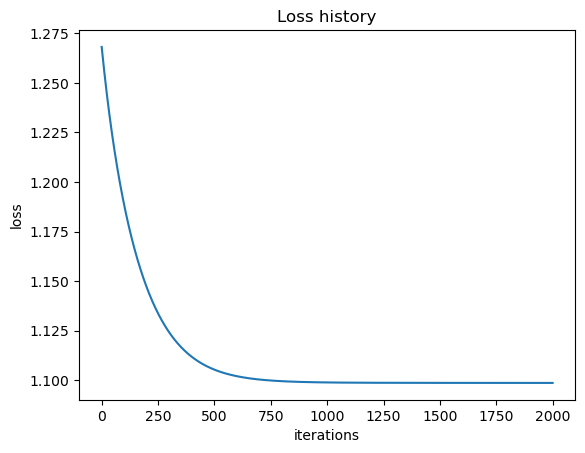

In [55]:
plt.plot(loss_history)
plt.title('Loss history')
plt.xlabel('iterations')
plt.ylabel('loss');

In [127]:
A1 = x_train.T

Z1 = np.dot(W1, A1) + b1
A2 = sigmoid(Z1)
Z2 = np.dot(W2, A2) + b2
A3 = sigmoid(Z2)
Z3 = np.dot(W3, A3) + b3
A4 = softmax(Z3)

In [128]:
y_train_new = np.argmax(y_train, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)
y_train_new

array([2, 2, 2, ..., 1, 0, 2])

In [129]:
from sklearn.metrics import accuracy_score

y_pred = np.argmax(A4, axis = 0)
print('точность для обучающей выборки', accuracy_score(y_train_new, y_pred))

точность для обучающей выборки 0.3322122122122122


In [130]:
A1 = x_test.T
 
Z1 = np.dot(W1, A1) + b1
A2 = sigmoid(Z1)
Z2 = np.dot(W2, A2) + b2
A3 = sigmoid(Z2)
Z3 = np.dot(W3, A3) + b3
A4 = softmax(Z3)
 
y_pred = np.argmax(A4, axis = 0)
 
print('точность для тестовой выборки', accuracy_score(y_test_new, y_pred))

точность для тестовой выборки 0.3281081081081081


In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 0, max_depth = 10, min_samples_leaf = 200)

cross_val_score(clf, x_train, y_train_new, cv=5)

array([0.33273273, 0.34064064, 0.33243243, 0.33223223, 0.33273273])

In [132]:
clf.fit(x_train, y_train_new)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=200, random_state=0)

In [133]:
clf.score(x_train, y_train_new)

0.36736736736736736

In [134]:
clf.score(x_test, y_test_new)

0.34306306306306306

In [126]:
filtered_doctors = df.groupby('Doctor').filter(
    lambda x: x['Test Results'].value_counts().max() >= 10
)
pop_doctors = filtered_doctors['Doctor'].unique()
df[df['Doctor'].isin(pop_doctors)]
#по итогу врачи, часто ставящие один диагноз, не должны влиять на процесс обучения (75 пациентов из 55.5к)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1266,LEaH martINez,84,Female,O-,Hypertension,2023-08-08,Matthew Smith,Coleman-Aguilar,Cigna,34961.906713,327,Emergency,2023-09-01,Aspirin,Normal
1482,MArK hUnteR,39,Male,O+,Asthma,2020-09-28,Michael Johnson,Vazquez and Sons,UnitedHealthcare,15563.566018,232,Urgent,2020-10-05,Paracetamol,Inconclusive
1671,JAcqUelINe SwaNSon,50,Male,AB-,Asthma,2021-05-13,Michael Johnson,Inc Travis,Blue Cross,19554.008049,204,Emergency,2021-06-12,Ibuprofen,Normal
1705,JAMES VaNcE,46,Male,O-,Hypertension,2019-08-31,Michael Johnson,PLC Hodge,Medicare,23537.741343,170,Urgent,2019-09-18,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53807,mElissa LeaCh,58,Male,O+,Cancer,2023-05-19,Michael Johnson,"Morton Haas Schwartz, and",UnitedHealthcare,17218.913134,246,Emergency,2023-06-09,Lipitor,Normal
54793,patRIcK lOGan,19,Female,B-,Hypertension,2022-11-04,Michael Smith,"and Molina Hernandez, Rhodes",Blue Cross,26579.661561,411,Elective,2022-11-08,Ibuprofen,Normal
55064,SydnEy PATTon,38,Female,O-,Hypertension,2019-06-13,Matthew Smith,"and Ortiz Fields Coleman,",Blue Cross,5431.692204,439,Emergency,2019-07-03,Penicillin,Normal
55099,ms. TaBiThA lOPEZ,61,Male,A+,Hypertension,2023-05-19,Stephanie Smith,"Scott Robinson Wilcox, and",UnitedHealthcare,48496.500144,114,Elective,2023-06-10,Ibuprofen,Normal
